In [1]:
## Face feature extraction using PCA

In [2]:
## Importing libraries

In [3]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.neural_network import MLPClassifier

In [4]:
## Loading and importing the dataset

In [5]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
#lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.3)
X= lfw_people.data
y=lfw_people.target
target_names=lfw_people.target_names
images=lfw_people.images
#print(X.shape)

In [6]:
n,h,w = images.shape
print(n,h,w)

1217 50 37


In [7]:
X.shape
# number of images or samples are less than dimensionalities or features if I set resize as 0.4 hence choosing 0.3

(1217, 1850)

In [8]:
len(target_names)

6

In [9]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 77, 236, 121, 530, 109, 144]))

In [10]:
## plotting the data 

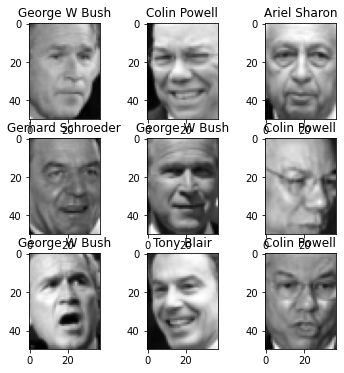

In [11]:
def plot_lfw(images, titles,h,w,rows=3,cols=3):
    plt.figure(figsize=(2*cols,2*rows))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape(h,w),cmap='gray')
        plt.title(target_names[titles[i]])
plot_lfw(X,y,h,w)

In [12]:
# spilting the train and test data

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train.shape

(1095, 1850)

In [15]:
pca=PCA(n_components=120)
pca.fit(X_train)

PCA(n_components=120)

In [16]:
X_train_trans_1 = pca.transform(X_train)
X_test_trans_1 = pca.transform(X_test)

In [17]:
## checking the shape of transformed trained data
X_train_trans_1.shape

(1095, 120)

In [18]:
print("Sample Data point after applying PCA\n", X_train_trans_1[0])

Sample Data point after applying PCA
 [ 1.8843967e+03  1.2173498e+02 -8.8246045e+02 -6.4566980e+02
  2.7310669e+02 -2.6214212e+02  5.4722803e+02  7.9852470e+01
 -3.6369867e+02  9.0613365e+00  2.0212723e+02  1.4928101e+02
 -2.9516705e+02 -8.8462608e+01 -8.6939026e+01 -2.5131271e+02
  1.3522586e+02 -3.6708542e+01  1.3752499e+02 -4.9527328e+01
 -2.5368770e+02  1.6897423e+01  5.2662872e+01  1.3238553e+02
 -1.7678476e+02  1.3557181e+02  1.1225069e+02 -1.7076546e+01
 -4.4958664e+01 -7.7479645e+01 -3.7796860e+01 -6.5475006e+01
 -3.9000286e+01 -9.0301659e+01  4.6496651e+01  3.3838230e+01
 -1.0851994e+02  6.7854546e+01 -1.2507789e+02  1.0922619e+02
  8.4207901e+01 -1.3380695e+02 -1.8661429e+02  2.6434549e+01
  3.2155800e+01  1.1505450e+01 -2.2860565e+00 -7.7489708e+01
  7.3646294e+01 -6.5107040e+01  1.1867351e+01 -7.8272713e+01
 -6.7270584e+00  1.8410522e+01  1.9893097e+01  4.2238930e+01
  5.3691704e+01 -9.9404938e+01  1.7036217e+02 -2.2563335e+01
 -1.3055954e+02  2.2406694e+01 -2.7246092e+01 -

In [24]:
clf = MLPClassifier(hidden_layer_sizes=(1024,),batch_size=128,verbose=True,early_stopping=True)
clf.fit(X_train_trans_1,y_train)

Iteration 1, loss = 16.71474389
Validation score: 0.681818
Iteration 2, loss = 4.87121466
Validation score: 0.772727
Iteration 3, loss = 1.52949027
Validation score: 0.781818
Iteration 4, loss = 0.39802245
Validation score: 0.763636
Iteration 5, loss = 0.07793781
Validation score: 0.790909
Iteration 6, loss = 0.02672452
Validation score: 0.790909
Iteration 7, loss = 0.00145654
Validation score: 0.809091
Iteration 8, loss = 0.00386299
Validation score: 0.818182
Iteration 9, loss = 0.00108113
Validation score: 0.809091
Iteration 10, loss = 0.00339842
Validation score: 0.809091
Iteration 11, loss = 0.00017127
Validation score: 0.800000
Iteration 12, loss = 0.00013793
Validation score: 0.800000
Iteration 13, loss = 0.00012275
Validation score: 0.800000
Iteration 14, loss = 0.00010920
Validation score: 0.800000
Iteration 15, loss = 0.00010640
Validation score: 0.800000
Iteration 16, loss = 0.00010368
Validation score: 0.800000
Iteration 17, loss = 0.00010112
Validation score: 0.800000
Itera

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(1024,),
              verbose=True)

In [25]:
y_pred = clf.predict(X_test_trans_1)
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.83      0.80        12
     Colin Powell       1.00      0.83      0.91        18
  Donald Rumsfeld       0.50      0.50      0.50        10
    George W Bush       0.88      0.88      0.88        56
Gerhard Schroeder       0.71      0.83      0.77        12
       Tony Blair       0.71      0.71      0.71        14

         accuracy                           0.81       122
        macro avg       0.76      0.76      0.76       122
     weighted avg       0.82      0.81      0.81       122



In [26]:
p=PCA()
p.fit(X_train)

PCA()

In [27]:
p.transform(X_train).shape

(1095, 1095)

In [28]:
var = p.explained_variance_
print(var)
com = p.components_
print(com.shape)

[4.8300334e+05 4.0527628e+05 1.9018375e+05 ... 6.0613012e-01 5.6561404e-01
 3.0668966e-06]
(1095, 1850)


In [29]:
n_samples, h, w = lfw_people.images.shape
n_features = X.shape[1]
print(n_samples,n_features)

1217 1850


In [30]:
# find the higher variance 
val_sum = np.sum(p.explained_variance_)
print(val_sum)
sort_ind = np.argsort(var) # return indices of variance in ascending order
sort_ind = sort_ind[::-1] # descending order
print(sort_ind)

2584120.0
[   0    1    2 ... 1092 1093 1094]


In [31]:
## considering the features contributing to 98 percentage of total
temp_sum = 0
principal_val =[]
principal_vec =[]
i = 0
while(temp_sum<0.98*val_sum):
    principal_vec.append(com[sort_ind[i],:])
    principal_val.append(var[sort_ind[i]])
    temp_sum+=var[sort_ind[i]]
    i+=1
print("Number of components is:",i)

Number of components is: 247


In [32]:
principal_vec = np.matrix(principal_vec)

In [33]:
print(principal_vec.shape)

(247, 1850)


In [34]:
## transforming dataset
X_train_trans = np.dot(X_train,principal_vec.T)
X_test_trans = np.dot(X_test,principal_vec.T)

In [35]:
X_train_trans.shape

(1095, 247)

In [36]:
clf = MLPClassifier(hidden_layer_sizes=(512,),batch_size=128,verbose=True,early_stopping=True)
clf.fit(X_train_trans,y_train)

Iteration 1, loss = 25.93009459
Validation score: 0.245455
Iteration 2, loss = 23.71320629
Validation score: 0.454545
Iteration 3, loss = 18.50820056
Validation score: 0.527273
Iteration 4, loss = 12.88955734
Validation score: 0.545455
Iteration 5, loss = 6.88299778
Validation score: 0.700000
Iteration 6, loss = 3.64305107
Validation score: 0.727273
Iteration 7, loss = 2.62400173
Validation score: 0.781818
Iteration 8, loss = 1.52689223
Validation score: 0.781818
Iteration 9, loss = 0.95403881
Validation score: 0.809091
Iteration 10, loss = 0.39121093
Validation score: 0.800000
Iteration 11, loss = 0.11762830
Validation score: 0.781818
Iteration 12, loss = 0.16306235
Validation score: 0.772727
Iteration 13, loss = 0.04034685
Validation score: 0.790909
Iteration 14, loss = 0.01093943
Validation score: 0.800000
Iteration 15, loss = 0.00664292
Validation score: 0.790909
Iteration 16, loss = 0.00014740
Validation score: 0.790909
Iteration 17, loss = 0.00014661
Validation score: 0.790909
It

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(512,),
              verbose=True)

In [37]:
y_pred = clf.predict(X_test_trans)
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.83      0.80        12
     Colin Powell       0.75      0.67      0.71        18
  Donald Rumsfeld       0.75      0.60      0.67        10
    George W Bush       0.89      0.86      0.87        56
Gerhard Schroeder       0.65      0.92      0.76        12
       Tony Blair       0.79      0.79      0.79        14

         accuracy                           0.80       122
        macro avg       0.77      0.78      0.76       122
     weighted avg       0.81      0.80      0.80       122



In [38]:
def plot_lfw(images, titles,h,w,rows=3,cols=3):
    plt.figure(figsize=(2*cols,2*rows))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape(h,w),cmap='gray')
        plt.title(titles[i])


In [39]:
# appending 247 images of size 50*37
n_components=247
mean_imgs = []
for i in range(n_components):
    v = principal_vec[i,:]
    img = v.reshape((h,w))
    mean_imgs.append(img)
mean_imgs = np.array(mean_imgs)
print(mean_imgs.shape)

(247, 50, 37)


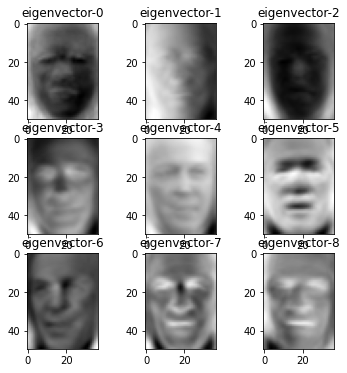

In [40]:
pca_tiles = [f"eigenvector-{i}" for i in range(n_components)]
#print(pca_tiles)
plot_lfw(mean_imgs, pca_tiles, h,w)